In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Sequential

### Define custom layers

In [2]:
class CustomDenseLayer(Layer):
    def __init__(self, units=32):
        super().__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)
    def call(self, inputs):
        return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)

### integrate custom layer in the model

The **Softmax** activation function is used in the output layer for multi-class classification tasks, ensuring the model outputs probabilities that sum up to 1 for each class, which aligns with categorical cross-entropy as the loss function. This adjustment ensures the model is optimized correctly for multi-class classification.


In [3]:
from tensorflow.keras.layers import Softmax

# Define the model with Softmax in the output layer
model = Sequential([
    CustomDenseLayer(128),
    CustomDenseLayer(10),  # Hidden layer with ReLU activation
    Softmax()              # Output layer with Softmax activation for multi-class classification
])


### Compile the model

In [4]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
print("Model summary before building:")
model.summary()

# Build the model to show parameters
model.build((1000, 20))
print("\nModel summary after building:")
model.summary()

Model summary before building:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer              │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_1            │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model summary after building:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer              │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_1            │ (1000, 10)             │         1,290 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (1000, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,978 (15.54 KB)

 Trainable params: 3,978 (15.54 KB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [5]:
import numpy as np 

# Generate random data 
x_train = np.random.random((1000, 20)) 
y_train = np.random.randint(10, size=(1000, 1)) 

# Convert labels to categorical one-hot encoding 
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10) 
model.fit(x_train, y_train, epochs=10, batch_size=32) 

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 2.3031
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 2.2994
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 2.2906
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 2.2931
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 2.2898
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 2.2936
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - loss: 2.2861
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 2.2876
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 2.2785
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 2.2781


### Evaluate the model

In [6]:
# Generate random test data 
x_test = np.random.random((200, 20)) 
y_test = np.random.randint(10, size=(200, 1)) 

# Convert labels to categorical one-hot encoding 
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10) 

# Evaluate the model 
loss = model.evaluate(x_test, y_test) 
print(f'Test loss: {loss}') 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3065 
Test loss: 2.3024442195892334


### Visualize Model Architecture

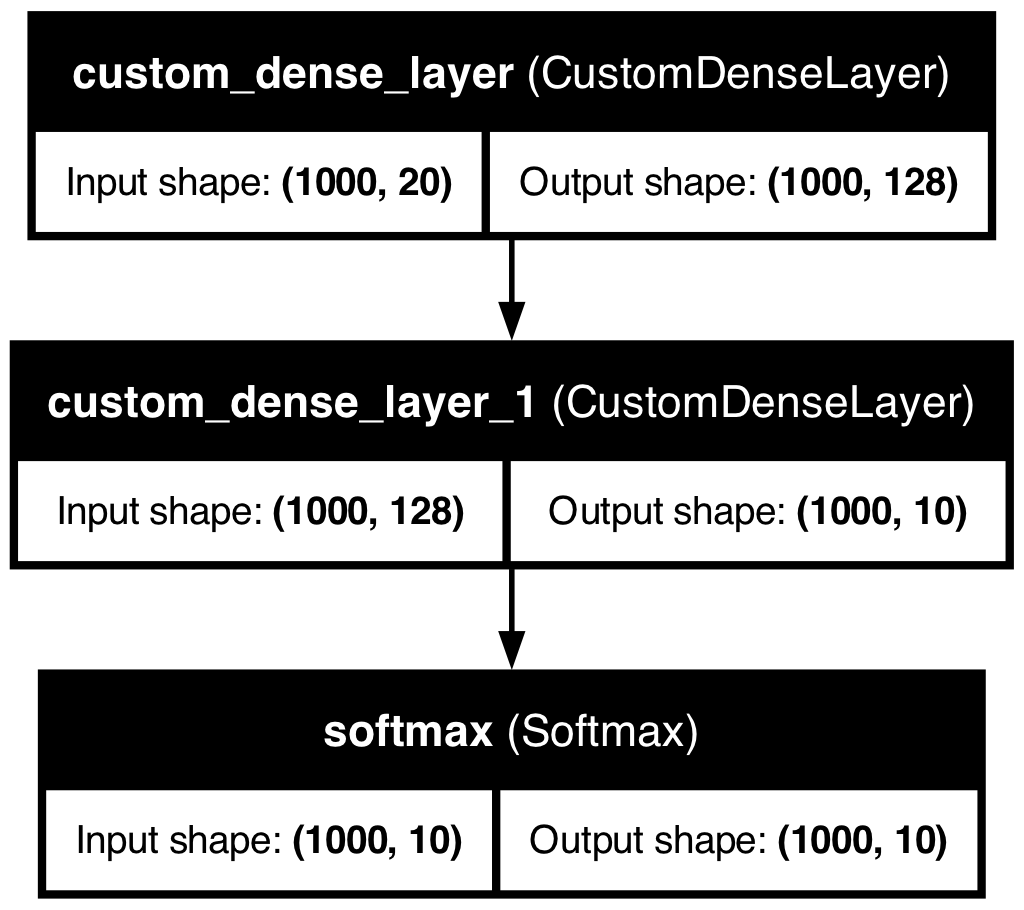

In [9]:
!pip install pydot graphviz
!pip install graphviz
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)